# Minichallenge 1 ;NPR
from Riccard Nef and Simon Luder


Challenge: evaluate 2 different systems on a text classification task.
Task : Sentimentanalysis from ....
Data:
System 1: SVM with Bag of words
System 2: CNN

## 1.0 Data
The Dataset we will use is called : Amazon product data
and is available [here.](http://jmcauley.ucsd.edu/data/amazon/)
This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs). We will only use the reviews of the books. Thats almost 9 Millions reviews, witch is enough for our task.

### 1.1 Data exploration

- length of sentences
- words, not stopwords, witch are common
- idk

In [54]:
import numpy
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [6]:
# nltk.download()

In [7]:
df = pd.read_json("../../src/Toys_and_Games_5.json",lines=True)

<AxesSubplot:>

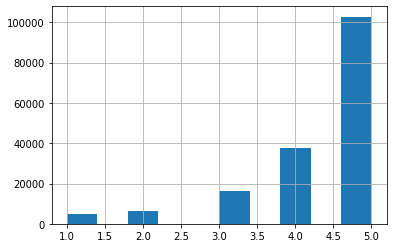

In [8]:
df["overall"].hist()

In [9]:
import seaborn as sns
df_rating = df[["reviewText","overall"]].copy()
df_rating = df_rating[df_rating["overall"]!=3]
df_rating["category"] = pd.cut(df_rating["overall"], 2, labels=["bad", "good"])

<AxesSubplot:>

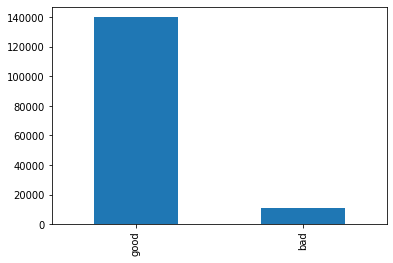

In [10]:
#dfraw = dfraw.drop(columns=["overall"])
df_rating.category.astype('category')
df_rating['category'].value_counts().plot(kind='bar')

We see that the distribution of the data is very unbalanced.

In [11]:
total_rev_count  = df_rating.shape[0]
df_value_count = df_rating["category"].value_counts(normalize= True).round(3)
df_value_count

good    0.927
bad     0.073
Name: category, dtype: float64

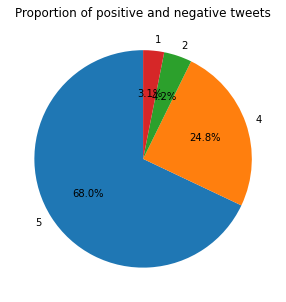

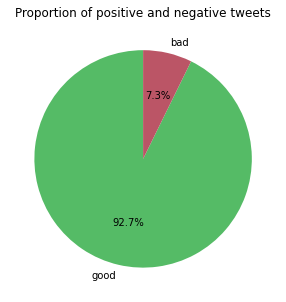

In [12]:
sizes = df_rating['overall'].value_counts()
labels = sizes.index

# visualization
fig = plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of positive and negative tweets")
plt.show()

sizes = df_rating['category'].value_counts()
labels = sizes.index
colors = '#55BB66', '#BB5566'

# visualization
fig = plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion of positive and negative tweets")
plt.show()

In [13]:
df_rating

,reviewText,overall,category
0,I like the item pricing. My granddaughter want...,5,good
1,Love the magnet easel... great for moving to d...,4,good
2,Both sides are magnetic. A real plus when you...,5,good
3,Bought one a few years ago for my daughter and...,5,good
4,I have a stainless steel refrigerator therefor...,4,good
...,...,...,...
167592,This drone is very fun and super duarable. Its...,5,good
167593,This is my brother's most prized toy. It's ext...,5,good
167594,This Panther Drone toy is awesome. I definitel...,5,good
167595,This is my first drone and it has proven to be...,5,good


We see that the bad reviews are only containing 7.3 % of all reviews. 93,3 % are good reviews.

## 2.0 DataPipeline

### Preprocessing

In [14]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, RegexpTokenizer
import string
import random

def remove_punctuation(sentence, p=None):
    '''Removes digits from a single sentence or a list of strings if words are in stop_words'''
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    if p:
        punctuations = p
    if isinstance(sentence, str):
        return sentence.translate(str.maketrans('', '', punctuations))
    if isinstance(sentence, list):
        sentence = [word for word in sentence if word not in punctuations]
    return sentence

def remove_digits(sentence):
    '''Removes digits from a single sentence or a list of strings'''
    if isinstance(sentence, str):
        return re.sub(r'[0-9]', '', sentence)
    if isinstance(sentence, list):
        return [re.sub(r'[0-9]', '', word) for word in sentence]

def remove_emojis(sentence):
    '''Removes emojis from a single sentence'''
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', sentence)

def remove_stop_words(sentence, stop_words):
    '''Removes stopwords from a list of strings sentence if words are in stop_words'''
    sentence = [word for word in sentence if word not in stop_words]
    return sentence

def print_sammples(series, idx):
    '''Prints samples from pandas series by a list of indices'''
    for i, sample in enumerate(data.iloc[check_samples]):
        print("'\033[1m' Sample {}: '\033[0m' {}\n".format(i+1, sample))

def lemmatize(sentence):
    "Lemmatizes a list of strings and returns as a list"
    return [WordNetLemmatizer().lemmatize(word) for word in sentence]
    


In [15]:
data = df_rating["reviewText"]

# convert everything to string
data = data.apply(str)

# convert to lowercase
data = data.apply(str.lower)

# remove digits
data = data.apply(remove_digits)

# remove punctuations
data = data.apply(remove_punctuation)

check_samples = random.sample(range(1, len(df_rating)), 3)
print_sammples(data, check_samples)

'' Sample 1: '' all the weapons from ninja turtles fit in this shell and we have every single one they love this shell

'' Sample 2: '' my son likes this new toy but i noticed that when he would come back to it it didnt turn on at the push of a button like most electronic toys i would have to turn it off then back on again it has an automatic time based off feature of course my son cant manage the small onoff switch on his owngreat sound effects and music tunes somewhat on the loud side but not an issue for us there is no volume controlhe mostly likes how the belt moves it beeps the coins the play food the credit card slide but hasnt shown interest in the sign pad unlike real ones he loves

'' Sample 3: '' my grandson is  and he plays more with this than anythinghe loves to draw and make designs he has adhd and this toy actuallygets him to sit still for a while



### 2.2 Tokenisieren

In [16]:
# from nltk.tokenize import RegexpTokenizer

# regexp = RegexpTokenizer('\w+')
# df2 = dfraw.copy()
# df2["reviewText"] = df2["reviewText"].str.lower()
# df2['text_token']=df2['reviewText'].apply(regexp.tokenize)
# df2.head(3)

In [17]:
# tokenize sentences
regexp = RegexpTokenizer('\w+')
data = data.apply(regexp.tokenize)

print_sammples(data, check_samples)

'' Sample 1: '' ['all', 'the', 'weapons', 'from', 'ninja', 'turtles', 'fit', 'in', 'this', 'shell', 'and', 'we', 'have', 'every', 'single', 'one', 'they', 'love', 'this', 'shell']

'' Sample 2: '' ['my', 'son', 'likes', 'this', 'new', 'toy', 'but', 'i', 'noticed', 'that', 'when', 'he', 'would', 'come', 'back', 'to', 'it', 'it', 'didnt', 'turn', 'on', 'at', 'the', 'push', 'of', 'a', 'button', 'like', 'most', 'electronic', 'toys', 'i', 'would', 'have', 'to', 'turn', 'it', 'off', 'then', 'back', 'on', 'again', 'it', 'has', 'an', 'automatic', 'time', 'based', 'off', 'feature', 'of', 'course', 'my', 'son', 'cant', 'manage', 'the', 'small', 'onoff', 'switch', 'on', 'his', 'owngreat', 'sound', 'effects', 'and', 'music', 'tunes', 'somewhat', 'on', 'the', 'loud', 'side', 'but', 'not', 'an', 'issue', 'for', 'us', 'there', 'is', 'no', 'volume', 'controlhe', 'mostly', 'likes', 'how', 'the', 'belt', 'moves', 'it', 'beeps', 'the', 'coins', 'the', 'play', 'food', 'the', 'credit', 'card', 'slide', 'bu

### 2.3 Stopwords

In [18]:
# import nltk
# from nltk.corpus import stopwords

# # Make a list of english stopwords
# stopwords = nltk.corpus.stopwords.words("english")

# # Extend the list with your own custom stopwords
# my_stopwords = ['https']
# stopwords.extend(my_stopwords)
# # Remove stopwords
# df2['text_token'] = df2['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
# df2.head(3)

In [19]:
# df2['text_token'] = df2['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
# df2.head(3)

In [20]:
# remove english stopwords
english_stopwords = stopwords.words("english")
data = data.apply(remove_stop_words, args=([english_stopwords]))

print_sammples(data, check_samples)

'' Sample 1: '' ['weapons', 'ninja', 'turtles', 'fit', 'shell', 'every', 'single', 'one', 'love', 'shell']

'' Sample 2: '' ['son', 'likes', 'new', 'toy', 'noticed', 'would', 'come', 'back', 'didnt', 'turn', 'push', 'button', 'like', 'electronic', 'toys', 'would', 'turn', 'back', 'automatic', 'time', 'based', 'feature', 'course', 'son', 'cant', 'manage', 'small', 'onoff', 'switch', 'owngreat', 'sound', 'effects', 'music', 'tunes', 'somewhat', 'loud', 'side', 'issue', 'us', 'volume', 'controlhe', 'mostly', 'likes', 'belt', 'moves', 'beeps', 'coins', 'play', 'food', 'credit', 'card', 'slide', 'hasnt', 'shown', 'interest', 'sign', 'pad', 'unlike', 'real', 'ones', 'loves']

'' Sample 3: '' ['grandson', 'plays', 'anythinghe', 'loves', 'draw', 'make', 'designs', 'adhd', 'toy', 'actuallygets', 'sit', 'still']




### 2.4 Lemmatisation

In [21]:
# from nltk.stem import WordNetLemmatizer

# wordnet_lem = WordNetLemmatizer()

# df2['text_token'] = df2['text_token'].apply(wordnet_lem.lemmatize)
# df2

In [22]:
from nltk.stem import WordNetLemmatizer
data = data.apply(lemmatize)

df_rating["word_tokens"] = data.apply(' '.join)
print_sammples(data, check_samples)

'' Sample 1: '' ['weapon', 'ninja', 'turtle', 'fit', 'shell', 'every', 'single', 'one', 'love', 'shell']

'' Sample 2: '' ['son', 'like', 'new', 'toy', 'noticed', 'would', 'come', 'back', 'didnt', 'turn', 'push', 'button', 'like', 'electronic', 'toy', 'would', 'turn', 'back', 'automatic', 'time', 'based', 'feature', 'course', 'son', 'cant', 'manage', 'small', 'onoff', 'switch', 'owngreat', 'sound', 'effect', 'music', 'tune', 'somewhat', 'loud', 'side', 'issue', 'u', 'volume', 'controlhe', 'mostly', 'like', 'belt', 'move', 'beep', 'coin', 'play', 'food', 'credit', 'card', 'slide', 'hasnt', 'shown', 'interest', 'sign', 'pad', 'unlike', 'real', 'one', 'love']

'' Sample 3: '' ['grandson', 'play', 'anythinghe', 'love', 'draw', 'make', 'design', 'adhd', 'toy', 'actuallygets', 'sit', 'still']



### 2.5 Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_rating["word_tokens"], df_rating["category"], test_size=0.25, random_state=30)
print("Train:", X_train.shape, y_train.shape,"Test: ",(X_test.shape,y_test.shape))

Train: (113430,) (113430,) Test:  ((37810,), (37810,))


### 2.6 TD-IDF with N-gramm

Der Parameter `min_df` erlaubt es Wörter ohne eine minimale "document frequency" zu ignorieren. Dadurch kann die Anzahl Dimensionen in der tf-idf Matrix deutlich veringert werden.

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Monogramm
vectorizer= TfidfVectorizer(ngram_range=(1, 1), min_df=5)
tfidf_X_train_mono = vectorizer.fit_transform(X_train)
tfidf_X_test_mono = vectorizer.transform(X_test)

# Bigramm
vectorizer= TfidfVectorizer(ngram_range=(1, 2), min_df=5)
tfidf_X_train_bi = vectorizer.fit_transform(X_train)
tfidf_X_test_bi = vectorizer.transform(X_test)

# Trigramm
vectorizer= TfidfVectorizer(ngram_range=(1, 3), min_df=5)
tfidf_X_train_tri = vectorizer.fit_transform(X_train)
tfidf_X_test_tri = vectorizer.transform(X_test)

print("Nr. of features with 1-gramm:", tfidf_X_train_mono.shape[1])
print("Nr. of features with 2-gramm:", tfidf_X_train_bi.shape[1])
print("Nr. of features with 3-gramm:", tfidf_X_train_tri.shape[1])

Nr. of features with 1-gramm: 20718
Nr. of features with 2-gramm: 170156
Nr. of features with 3-gramm: 210773


## 3.0 Model 1 : Support Vector Machine

In [72]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

In [47]:
# balanced class weights

clf = LinearSVC(random_state=0, class_weight="balanced")
clf.fit(tfidf_X_train_mono, y_train)
y_test_pred = clf.predict(tfidf_X_test_mono)
y_train_pred = clf.predict(tfidf_X_train_mono)
report = classification_report(y_test, y_test_pred,output_dict=True)
report

{'bad': {'precision': 0.5284090909090909,
  'recall': 0.7764065335753176,
  'f1-score': 0.6288402175510803,
  'support': 2755},
 'good': {'precision': 0.9817546353888987,
  'recall': 0.9455427185850805,
  'f1-score': 0.9633084848220643,
  'support': 35055},
 'accuracy': 0.9332187252049722,
 'macro avg': {'precision': 0.7550818631489948,
  'recall': 0.8609746260801991,
  'f1-score': 0.7960743511865723,
  'support': 37810},
 'weighted avg': {'precision': 0.9487219198363499,
  'recall': 0.9332187252049722,
  'f1-score': 0.9389376814279473,
  'support': 37810}}

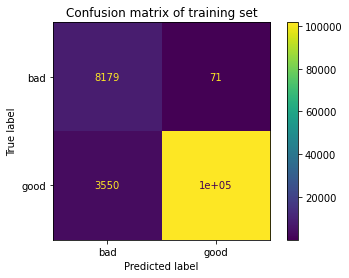

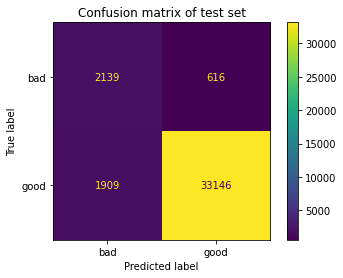

In [48]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Confusion matrix of training set")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Confusion matrix of test set")
plt.show()

In [51]:
f1_score(y_test, y_test_pred, average="macro")

0.7960743511865723

## 4.0 CNN for Sentinentanals
https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

1. Vocab, filter alle Wörter heraus die nicht mehr als n mal vorkommen
2. Padding
3.

### 4.1 Weight and Biases

In [ ]:
#W&B
import wandb
from wandb.keras import WandbCallback

wandb.init(project="nlp", entity="riccci")
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}


In [ ]:
X_train_copy = X_train.copy().to_frame()
X_train_copy["counts"] = X_train_copy["word_tokens"].str.split().value_counts()
X_train_copy

KeyboardInterrupt: 

In [ ]:
#Vocabulray
def make_voc(words,reduction=0.5):
    # takes a list of all words and returns list of all unique words
    voc = []
    for word in words:
        if words.contain(word):
            continue
        else: voc.append(word)
    return voc

### 4.2 Preprocessing

In [ ]:
# Preprocessing
#lenght for Embedding
from keras.preprocessing.sequence import pad_sequences

vocab_size = len(vectorizer.word_index) + 1
max_length = X_train_copy["counts"].max()

#padding
encoded_docs = vectorizer.texts_to_sequences(X_train)
X_train = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

### 4.3 Model mit Keras

In [ ]:
from keras.models import Sequential
from keras import layers

# define model
model = Sequential()
model.add(layers.Embedding(vocab_size, 100, input_length=max_length))
model.add(layers.Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())     
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

59199     good
47658     good
141416    good
17017     good
102046    good
          ... 
106073    good
73052     good
50751     good
109066    good
52809     good
Name: category, Length: 113430, dtype: category
Categories (2, object): ['bad' < 'good']

In [ ]:
type(X_train_copy)

pandas.core.series.Series

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1330890   
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,330,901
Trainable params: 1,330,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

from keras.backend import clear_session
clear_session()

ValueError: in user code:

    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 133088, but received input with shape (10, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(10, 1), dtype=string)
      • training=True
      • mask=None


In [ ]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

ValueError: in user code:

    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ricca\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 133088, but received input with shape (None, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=False
      • mask=None


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [ ]:
# Start tensorboard.
plot_history(history)

NameError: name 'history' is not defined